**SVM linéaires**

***Jeu de données Iris***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

In [2]:
# Chargement des données
iris = datasets.load_iris()
X, y = iris.data[:, :2], iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [3]:
C = 1.0 # paramètre de régularisation
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

In [7]:
# Question
# Calculez le score d’échantillons bien classifiés sur le jeu de données de test.
# methode 1
accuracy_1 = lin_svc.score(X_test, y_test)
print(f'le score d’échantillons bien classifiés methode1:{accuracy_1}')
#methode 2
y_pred = lin_svc.predict(X_test)
accuracy_2 = (sum (y_test == y_pred)) / len(X_test)
print(f'le score d’échantillons bien classifiés methode2:{accuracy_2}')

le score d’échantillons bien classifiés methode1:0.7866666666666666
le score d’échantillons bien classifiés methode2:0.7866666666666666


In [ ]:
# Visualisons  la surface de décision apprise par notre modèle :

Visualisons  la surface de décision apprise par notre modèle :

In [26]:
def plot_surface(model):
  # Créer la surface de décision discretisée
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  # Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
  h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  # Surface de décision
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
  # Afficher aussi les points d'apprentissage
  plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k',
  c=y_train, cmap=plt.cm.coolwarm)
  plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test,
  cmap=plt.cm.coolwarm)
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.title("LinearSVC")

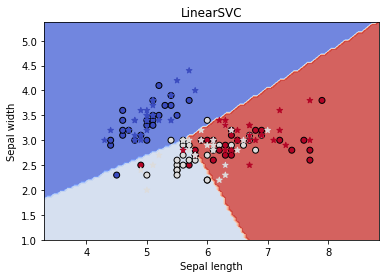

In [27]:
plot_surface(lin_svc)

In [28]:
#Question :
#Testez différentes valeurs pour le paramètre C. Comment la frontière de décision évolue en fonction de C ?
def surface_changeC(c):
  lin_svc = svm.LinearSVC(C=c)
  lin_svc.fit(X_train, y_train)
  print(lin_svc.score(X_test,y_test))
  plot_surface(lin_svc)

0.8133333333333334


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


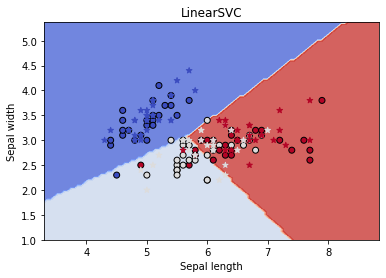

In [29]:
surface_changeC(3)

0.8


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


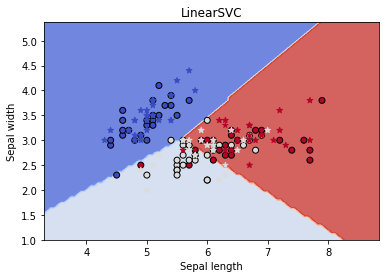

In [30]:
surface_changeC(10)


0.8133333333333334


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


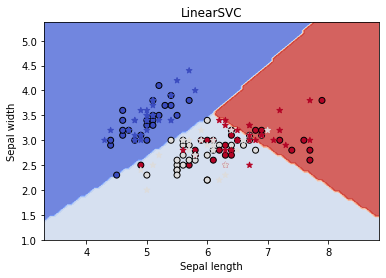

In [31]:
surface_changeC(100)


In [32]:
# quand augmente le parametere C, les frontières se tendent à minimiser la marge entre les classes pour bien classer les données d'entrainement,
# mais une valuer trop élevée peut donner un classifieur qui peut pas bien généraliser sur le test

quand augmente le parametere C, les frontières se tendent à minimiser la marge entre les classes pour bien classer les données d'entrainement, mais une valuer trop élevée peut donner un classifieur qui peut pas bien généraliser sur le test

**Question**

Question
D’après la visualisation ci-dessus, ce modèle vous paraît-il adapté au problème ? Si non, que peut-on faire pour l’améliorer ?

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


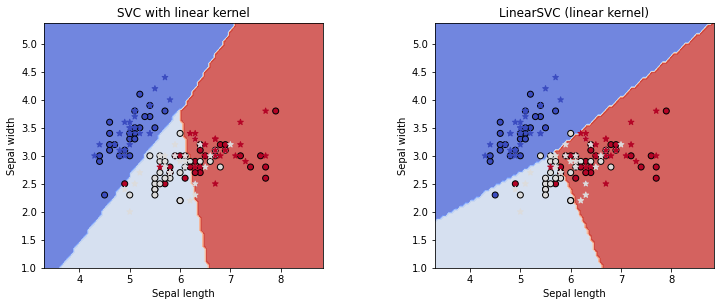

In [35]:

lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train)
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
titles = ['SVC with linear kernel', 'LinearSVC (linear kernel)']
fig = plt.figure(figsize=(12, 4.5))
for i, clf in enumerate((svc, lin_svc)):
  plt.subplot(1, 2, i + 1)
  plt.subplots_adjust(wspace=0.4, hspace=0.4)
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  # Utiliser une palette de couleurs
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
  # Afficher aussi les points d'apprentissage
  plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k',
  c=y_train, cmap=plt.cm.coolwarm)
  plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*',
  c=y_test, cmap=plt.cm.coolwarm)
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.title(titles[i])
plt.show()

**QUESTION**

Question
Réalisez l’optimisation d’une nouvelle machine à vecteur de support linéaire
mais en utilisant les quatre attributs du jeu de données Iris. Le score de
classification en test a-t-il augmenté ? Pourquoi ?

In [38]:
X, y = iris.data, iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
C = 1.0 # paramètre de régularisation
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)
lin_svc.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.9466666666666667

In [39]:
# le score a augmenté cette fois en utilisans toutes les attributs , puisqueSVM Très efficaces en dimension élevée 

***Jeu de données Digits***

In [40]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

In [48]:
print(f"n" {X.shape[0]}")
print(f"nomber of attribute {X.shape[1]}")

nomber of data 1797
nomber of attribute 64


**Question**

In [ ]:
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
C = 1.0 # paramètre de régularisation
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)